In [0]:
import numpy as np
import math
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [42]:
estimator = KMeans(n_clusters=3)
estimator.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
print({i: np.where(estimator.labels_ == i)[0] for i in range(estimator.n_clusters)}) #get the indices of points for each cluster

{0: array([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
       119, 121, 123, 126, 127, 133, 138, 142, 146, 149]), 1: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 2: array([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
       115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
       134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148])}


In [0]:
y_kmeans = estimator.fit_predict(X)

In [45]:
clusters_centroids=dict()
clusters_radii= dict()

'''looping over clusters and calculate Euclidian distance of 
each point within that cluster from its centroid and 
pick the maximum which is the radius of that cluster'''

print("radii are : ")

for cluster in list(set(y)):

    clusters_centroids[cluster]=list(zip(estimator.cluster_centers_[:, 0],estimator.cluster_centers_[:,1]))[cluster]
    
    bb = zip( X[ ( y_kmeans == cluster ), 0 ], X[ ( y_kmeans == cluster ), 1 ] )
    
    gp = []
    
    for i in bb:
        # gp.append( np.linalg.norm(i-clusters_centroids[cluster])  )
        #print (i[0], "woow", i[1])
        #print (clusters_centroids[0][0], "woow", clusters_centroids[0][1])
        kg = math.sqrt( pow( ( i[0] - clusters_centroids[cluster][0] ) , 2 ) + pow( ( i[1] - clusters_centroids[cluster][1] ), 2 ) )
        gp.append( kg )
      
    clusters_radii[cluster]=max( gp )
    
    print ( cluster, ":", clusters_radii[cluster] )

radii are : 
0 : 1.1876061757670695
1 : 1.2362928455669395
2 : 1.2767280940117136


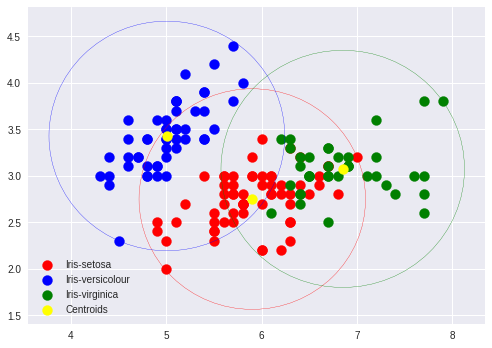

In [46]:
fig, ax = plt.subplots(1,figsize=(7,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
art = mpatches.Circle(clusters_centroids[0],clusters_radii[0], edgecolor='r',fill=False)
ax.add_patch(art)

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
art = mpatches.Circle(clusters_centroids[1],clusters_radii[1], edgecolor='b',fill=False)
ax.add_patch(art)

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
art = mpatches.Circle(clusters_centroids[2],clusters_radii[2], edgecolor='g',fill=False)
ax.add_patch(art)

#Plotting the centroids of the clusters
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.tight_layout()
plt.savefig('kmeans.jpg',dpi=300)
plt.show()